In [318]:
# Import necessary modules
import pandas as pd
import matplotlib as plt
from matplotlib.pyplot import figure
import numpy as np

In [319]:
strt2 = pd.read_csv('./data/filtedstreets.csv', sep= ",")
bikecl = pd.read_csv('./data/bikecollisiondata_with_nearest_street_index2_updated.csv', sep= ",")

In [311]:
len(strt2)* 3 / len(bikecl) 

12.35062204310496

In [312]:
bikecl.columns
#cl.shape

Index(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE',
       'INTKEY', 'LOCATION', 'EXCEPTRSNC', 'EXCEPTRSND', 'SEVERITYCO',
       'SEVERITYDE', 'COLLISIONT', 'PERSONCOUN', 'PEDCOUNT', 'PEDCYLCOUN',
       'VEHCOUNT', 'INJURIES', 'SERIOUSINJ', 'FATALITIES', 'INCDATE',
       'INCDTTM', 'JUNCTIONTY', 'SDOT_COLCO', 'SDOT_COLDE', 'INATTENTIO',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTG',
       'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKK', 'HITPARKEDC', 'geometry', 'near_str_index', 'min_length',
       'weather_group', 'date', 'time', 'hour', 'dayofweek', 'weekday',
       'rushhour', 'weather_group2'],
      dtype='object')

In [320]:

bikecl.groupby('weather_group2').size().reset_index()

,weather_group2,0
0,Clear or Partly Cloudy,4939
1,Raining,631


In [321]:
bikecl.groupby('rushhour').size().reset_index()

,rushhour,0
0,0.0,1918
1,1.0,3153


In [322]:
strt2['index'] = strt2.index ## strt2 index that was used to match min distance for street

In [323]:
#full = pd.merge(acc_by_str, street, left_on='LOCATION', right_on='UNITDESC', how='outer')

In [324]:
import random
#random.seed(9001)
simulate_weather = np.random.choice(a=['Clear or Partly Cloudy', 'Raining'],  size= len(strt2)*5,  p=[0.58, 0.42], replace = True ) 

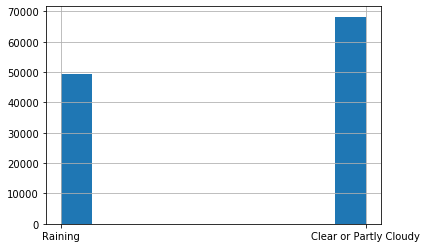

In [296]:
pd.Series(simulate_weather).hist()

In [297]:
#simulate_weekday = np.random.choice(a=[0,1],  size= len(strt2)*5,  p=[0.285, 0.715], replace = True) 

In [298]:
simulate_rushhour = np.random.choice(a=[0,1],  size= len(strt2)*3,  p=[0.73, 0.27], replace = True) 

In [299]:
#simulate_street = pd.concat([strt2]*5, ignore_index=True)  
#simulate_street.columns

Index(['OBJECTID', 'ARTCLASS', 'COMPKEY', 'UNITIDSORT', 'UNITDESC',
       'STNAME_ORD', 'XSTRLO', 'XSTRHI', 'ARTDESCRIP', 'OWNER', 'STATUS',
       'BLOCKNBR', 'SPEEDLIMIT', 'SEGDIR', 'ONEWAY', 'ONEWAYDIR', 'FLOW',
       'SEGLENGTH', 'SURFACEWID', 'SURFACETYP', 'SURFACET_1', 'INTRLO',
       'DIRLO', 'INTKEYLO', 'INTRHI', 'DIRHI', 'NATIONHWYS', 'STREETTYPE',
       'PVMTCONDIN', 'PVMTCOND_1', 'TRANCLASS', 'TRANDESCRI', 'SLOPE_PCT',
       'PVMTCATEGO', 'PARKBOULEV', 'SHAPE_Leng', 'geometry', 'index'],
      dtype='object')

In [300]:
#simulate_street = np.random.choice(len(strt2) * 5,  size = len(strt2) * 3,  replace = False) 


#simulate_street['simulate_weekday'] = simulate_weekday
simulate_street['simulate_rushhour'] = simulate_rushhour
#simulate_street['simulate_weather'] = simulate_weather


In [301]:
simulate_street.columns

Index(['OBJECTID', 'ARTCLASS', 'COMPKEY', 'UNITIDSORT', 'UNITDESC',
       'STNAME_ORD', 'XSTRLO', 'XSTRHI', 'ARTDESCRIP', 'OWNER', 'STATUS',
       'BLOCKNBR', 'SPEEDLIMIT', 'SEGDIR', 'ONEWAY', 'ONEWAYDIR', 'FLOW',
       'SEGLENGTH', 'SURFACEWID', 'SURFACETYP', 'SURFACET_1', 'INTRLO',
       'DIRLO', 'INTKEYLO', 'INTRHI', 'DIRHI', 'NATIONHWYS', 'STREETTYPE',
       'PVMTCONDIN', 'PVMTCOND_1', 'TRANCLASS', 'TRANDESCRI', 'SLOPE_PCT',
       'PVMTCATEGO', 'PARKBOULEV', 'SHAPE_Leng', 'geometry', 'index',
       'simulate_weekday', 'simulate_rushhour', 'simulate_weather'],
      dtype='object')

In [302]:
len(simulate_street)

117475

In [303]:
## drop duplicates 
simulate_street_nodup = simulate_street.drop_duplicates().copy().reset_index(drop = True)
len(simulate_street_nodup )

83250

In [304]:
random_num = np.random.choice(len(simulate_street_nodup), size = len(simulate_street_nodup),  replace = False) 
simulate_street_nodup['random_num'] = random_num
simulate_street_nodup_sorted = simulate_street_nodup.sort_values(by=['random_num'])
                                #shuffle the street 

In [305]:

#Inner join 
full = pd.merge(simulate_street_nodup_sorted, bikecl, left_on=['index','simulate_weekday', 'simulate_rushhour',
       'simulate_weather'], right_on=['near_str_index','weekday','rushhour', 'weather_group2'], suffixes=('_left', '_right'), how = 'inner')